# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.129082e+01     7.376721e+00
 * time: 0.0015330314636230469
     1     2.921931e+01     4.122988e+00
 * time: 0.00618290901184082
     2     1.971426e+01     3.722899e+00
 * time: 0.010654926300048828
     3     1.371019e+01     3.571718e+00
 * time: 0.01514291763305664
     4     1.088775e+01     1.509088e+00
 * time: 0.019632816314697266
     5     1.055819e+01     2.650728e+00
 * time: 0.02338886260986328
     6     9.852205e+00     1.427207e+00
 * time: 0.026872873306274414
     7     9.113079e+00     1.576769e+00
 * time: 0.03066086769104004
     8     8.645014e+00     1.432654e+00
 * time: 0.0343170166015625
     9     8.413131e+00     1.224379e+00
 * time: 0.03857302665710449
    10     8.298653e+00     9.325045e-01
 * time: 0.04317903518676758
    11     8.164446e+00     1.039005e+00
 * time: 0.04817700386047363
    12     8.097627e+00     6.374123e-01
 * time: 0.05196785926818848
    13     8.036193e+00     5.770822e-01
 * t

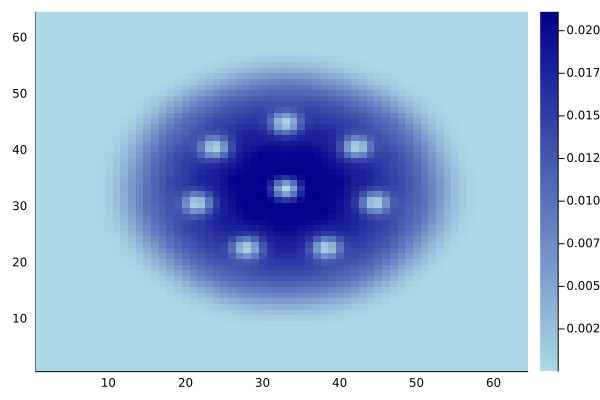

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)